<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/TensorFlow/Learning_Neural_Network_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.15.0


### **Utility Functions**

In [ ]:
def visualize_predictions(X_train, y_train, X_test, y_test, y_pred, model):
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, c='0', label="Training data")
  plt.scatter(X_test, y_test, c='r', label="Testing data")
  plt.scatter(X_test, y_pred, c='b', label="Predicted data")

  plt.title(f"y = X + 10 (Model : {model})", fontweight='bold')
  plt.xlabel("X", fontweight='bold')
  plt.ylabel("y", fontweight='bold')
  plt.legend()

  plt.show()

def mse(y_test, y_pred):
  return tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_pred)).numpy()

def mae(y_test, y_pred):
  return tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_pred)).numpy()

## Inputs

In [ ]:
tf.random.set_seed(99)

X = tf.range(-100, 100, 4)
y = X + 10

X_train, y_train, X_test, y_test = X[:25], y[:25], X[25:], y[25:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4], dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6],
       dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
        68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,
         62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
       dtype=int32)>)

## Model 1

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="Input")
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

y_pred1 = model1.predict(tf.expand_dims(X_test, axis=-1))

NameError: name 'tf' is not defined

In [ ]:
model1.build()
model1.summary()

plot_model(model1)

In [ ]:
visualize_predictions(X_train, y_train, X_test, y_test, y_pred1, 1)

In [ ]:
mae_1, mse_1 = (mae(y_test, y_pred1), mse(y_test, y_pred1))
mae_1, mse_1

## Model **2**

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="Layer_1"),
    tf.keras.layers.Dense(1, name="Layer_2"),
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

y_pred2 = model2.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 56ms/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 10)                20        
                                                                 
 Layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


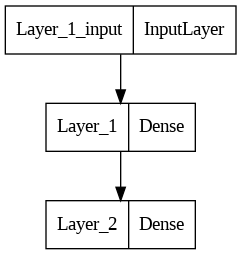

In [ ]:
model2.build()
model2.summary()

plot_model(model2)

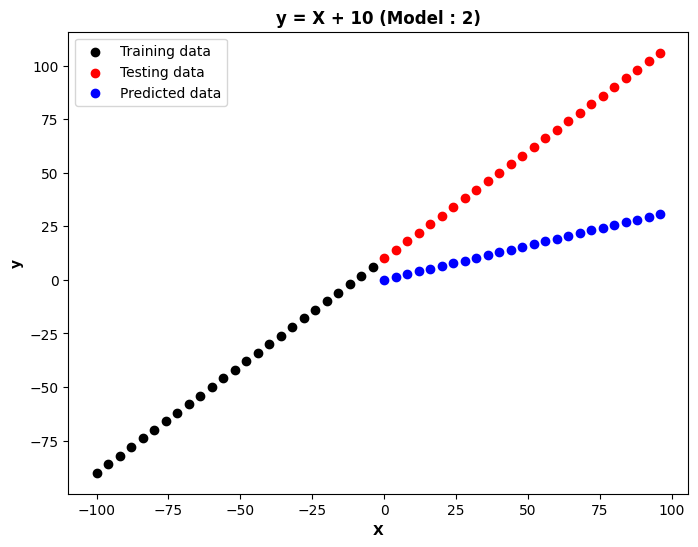

In [ ]:
visualize_predictions(X_train, y_train, X_test, y_test, y_pred2, 2)

In [ ]:
mae_2, mse_2 = (mae(y_test, y_pred2), mse(y_test, y_pred2))
mae_2, mse_2

(42.60023, 2200.4055)

## Model **3**

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="Layer_1"),
    tf.keras.layers.Dense(1, name="Layer_2"),
])

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

y_pred3 = model3.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 42ms/step


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 10)                20        
                                                                 
 Layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


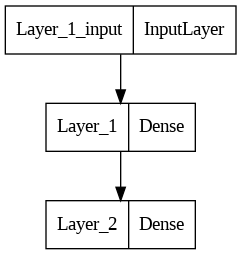

In [ ]:
model3.build()
model3.summary()

plot_model(model3)

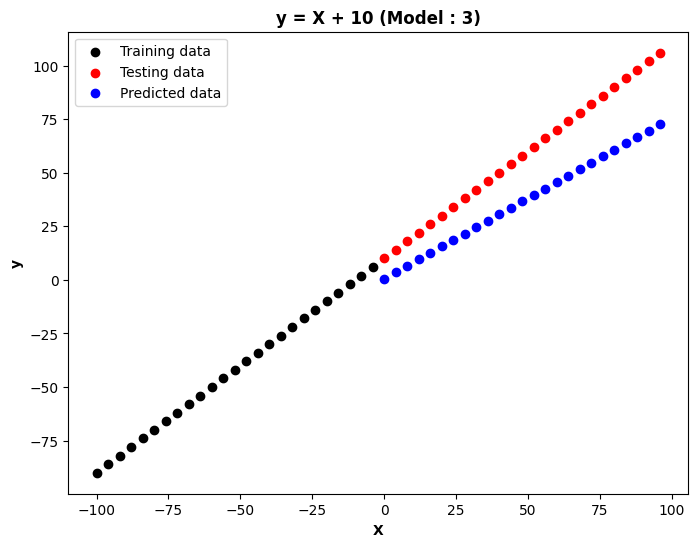

In [ ]:
visualize_predictions(X_train, y_train, X_test, y_test, y_pred3, 3)

In [ ]:
mae_3, mse_3 = (mae(y_test, y_pred3), mse(y_test, y_pred3))
mae_3, mse_3

(21.394, 509.32532)

## Comparing the models

In [ ]:
model_results = pd.DataFrame({
    "model": [1, 2, 3],
    "mae": [mae_1, mae_2, mae_3],
    "mse": [mse_1, mse_2, mse_3],
})

model_results

,model,mae,mse
0,1,29.928875,1041.097534
1,2,42.600231,2200.405518
2,3,21.393999,509.325317


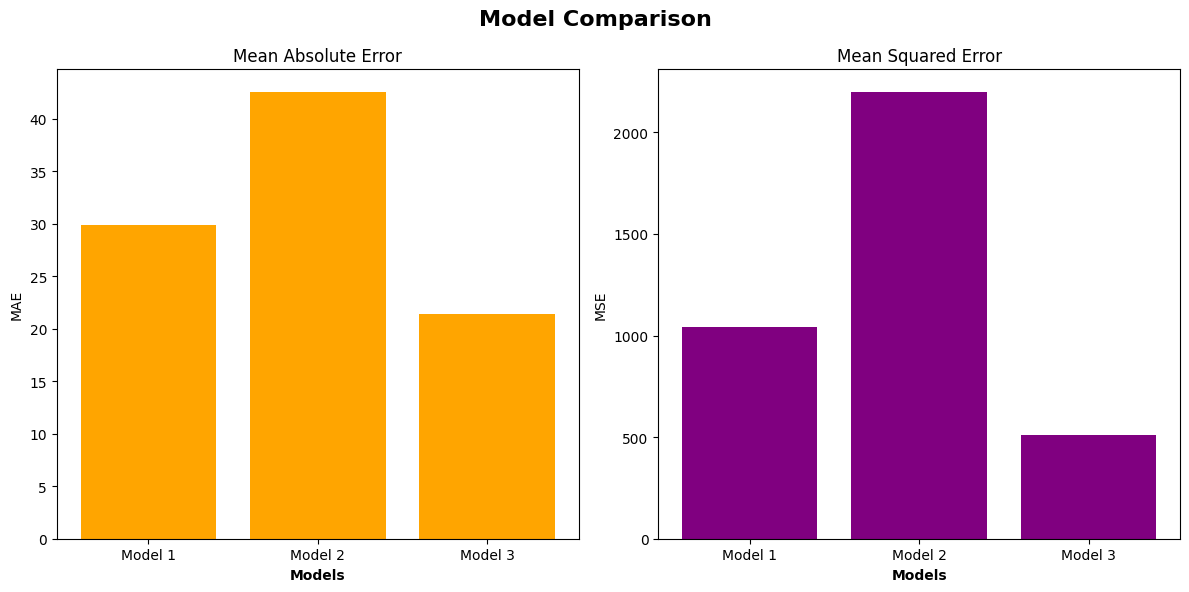

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
fig.suptitle("Model Comparison", fontweight="bold", fontsize=16)

axs[0].bar(model_results["model"], model_results["mae"], color='orange')
axs[0].set_xticks(range(1, len(model_results["model"]) + 1))
axs[0].set_xticklabels(["Model 1", "Model 2", "Model 3"])
axs[0].set_title("Mean Absolute Error")
axs[0].set_ylabel("MAE")
axs[0].set_xlabel("Models", fontweight='bold')

axs[1].bar(model_results["model"], model_results["mse"], color='purple')
axs[1].set_xticks(range(1, len(model_results["model"]) + 1))
axs[1].set_xticklabels(["Model 1", "Model 2", "Model 3"])
axs[1].set_title("Mean Squared Error")
axs[1].set_ylabel("MSE")
axs[1].set_xlabel("Models", fontweight='bold')

plt.show()

## Saving the model
Using the **SavedModel** format

In [ ]:
model2.save("best_model")

## Loading the saved model

In [ ]:
modelx = tf.keras.models.load_model("/content/best_model")
modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 10)                20        
                                                                 
 Layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


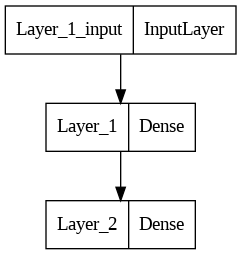

In [ ]:
plot_model(modelx)

In [ ]:
yp = modelx.predict(tf.expand_dims(X_test, -1))

print(True) if np.all(yp == y_pred2) and mae(y_test, yp) == mae_2 else print(False)

1/1 [==============================] - 0s 19ms/step
True
